# Jonathan Halverson
# Wednesday, April 6, 2016
# Secondary school data

Here we construct a regression model for predict the exam score of a student based on several properties. The original data set contains categorical nominal data. Various preprocessing techniques are used to deal with this.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [2]:
# http://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION#
df = pd.read_csv('student-mat.csv', sep=';')
df.head().transpose()

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


### Attributes for student-mat.csv (Math course) datasets:

1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex (binary: "F" - female or "M" - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: "U" - urban or "R" - rural)
5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. guardian - student's guardian (nominal: "mother", "father" or "other")
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

The three grades above are related with the course subject of Math

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

### Data cleaning

One could use replace on nominal columns, but below we will use get_dummies of pandas.

In [4]:
df['school'] = df['school'].replace({'GP':0, 'MS':1})
df['sex'] = df['sex'].replace({'M':0, 'F':1})
df['address'] = df['address'].replace({'U':0, 'R':1})
df['famsize'] = df['famsize'].replace({'LE3':0, 'GT3':1})
df['Pstatus'] = df['Pstatus'].replace({'A':0, 'T':1})
# for the non-binary nominal entries, one needs to create indicators (more columns)
#df['Mjob'] = df['Mjob'].replace({'teacher':0, 'health':1, 'services':2, 'at_home':3, 'other':4})
#df['Fjob'] = df['Fjob'].replace({'teacher':0, 'health':1, 'services':2, 'at_home':3, 'other':4})
#df['reason'] = df['reason'].replace({'home':0, 'reputation':1, 'course':2, 'other':3})
#df['guardian'] = df['guardian'].replace({'mother':0, 'father':1, 'other':2})
df = df.applymap(lambda x: 1 if x == 'yes' else x)
df = df.applymap(lambda x: 0 if x == 'no' else x)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null int64
sex           395 non-null int64
age           395 non-null int64
address       395 non-null int64
famsize       395 non-null int64
Pstatus       395 non-null int64
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null int64
famsup        395 non-null int64
paid          395 non-null int64
activities    395 non-null int64
nursery       395 non-null int64
higher        395 non-null int64
internet      395 non-null int64
romantic      395 non-null int64
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 non-null int64


In [6]:
df = pd.get_dummies(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 46 columns):
school               395 non-null int64
sex                  395 non-null int64
age                  395 non-null int64
address              395 non-null int64
famsize              395 non-null int64
Pstatus              395 non-null int64
Medu                 395 non-null int64
Fedu                 395 non-null int64
traveltime           395 non-null int64
studytime            395 non-null int64
failures             395 non-null int64
schoolsup            395 non-null int64
famsup               395 non-null int64
paid                 395 non-null int64
activities           395 non-null int64
nursery              395 non-null int64
higher               395 non-null int64
internet             395 non-null int64
romantic             395 non-null int64
famrel               395 non-null int64
freetime             395 non-null int64
goout                395 non-null int64
Dalc           

In [8]:
df.describe().applymap(lambda x: round(x, 1)).transpose()

,count,mean,std,min,25%,50%,75%,max
school,395.0,0.1,0.3,0.0,0.0,0.0,0.0,1.0
sex,395.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
age,395.0,16.7,1.3,15.0,16.0,17.0,18.0,22.0
address,395.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
famsize,395.0,0.7,0.5,0.0,0.0,1.0,1.0,1.0
Pstatus,395.0,0.9,0.3,0.0,1.0,1.0,1.0,1.0
Medu,395.0,2.7,1.1,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.5,1.1,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.4,0.7,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.0,0.8,1.0,1.0,2.0,2.0,4.0


### Exploratory data analysis

In [9]:
df.corr().applymap(lambda x: round(x, 1))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
school,1.0,0.0,0.4,0.3,-0.1,0.0,-0.1,-0.1,0.2,-0.1,...,-0.1,0.1,-0.0,0.1,-0.0,0.1,-0.1,0.0,-0.1,0.1
sex,0.0,1.0,0.0,-0.0,0.1,-0.0,-0.1,-0.0,-0.1,0.3,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.1,-0.1,0.0,0.1
age,0.4,0.0,1.0,0.1,-0.0,0.0,-0.2,-0.2,0.1,-0.0,...,0.0,0.0,-0.1,-0.0,0.0,0.0,-0.0,-0.1,-0.1,0.4
address,0.3,-0.0,0.1,1.0,0.1,0.0,-0.1,-0.1,0.3,0.0,...,0.1,-0.0,-0.0,0.0,-0.2,0.0,0.1,-0.1,0.1,-0.0
famsize,-0.1,0.1,-0.0,0.1,1.0,0.1,0.0,0.1,-0.1,0.1,...,-0.0,0.0,0.1,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0
Pstatus,0.0,-0.0,0.0,0.0,0.1,1.0,-0.1,-0.1,0.0,0.0,...,-0.0,0.1,-0.1,0.0,-0.0,0.0,-0.0,0.1,-0.1,-0.1
Medu,-0.1,-0.1,-0.2,-0.1,0.0,-0.1,1.0,0.6,-0.2,0.1,...,-0.1,-0.0,0.3,-0.1,-0.0,0.0,0.1,-0.0,0.1,-0.1
Fedu,-0.1,-0.0,-0.2,-0.1,0.1,-0.1,0.6,1.0,-0.2,-0.0,...,-0.3,0.0,0.3,-0.0,-0.0,-0.0,0.0,0.1,-0.0,-0.1
traveltime,0.2,-0.1,0.1,0.3,-0.1,0.0,-0.2,-0.2,1.0,-0.1,...,0.1,-0.0,0.0,0.1,-0.1,-0.0,-0.0,0.0,-0.1,0.0
studytime,-0.1,0.3,-0.0,0.0,0.1,0.0,0.1,-0.0,-0.1,1.0,...,-0.0,0.0,-0.1,-0.1,-0.0,-0.1,0.2,0.0,-0.0,0.0


### Move the target to the first column:

In [10]:
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('G3')))
df = df.reindex(columns=cols)

The correlation matrix indicates that G3 is correlated with G1 and G2. There is a correlation of -0.4 with failures and G3.

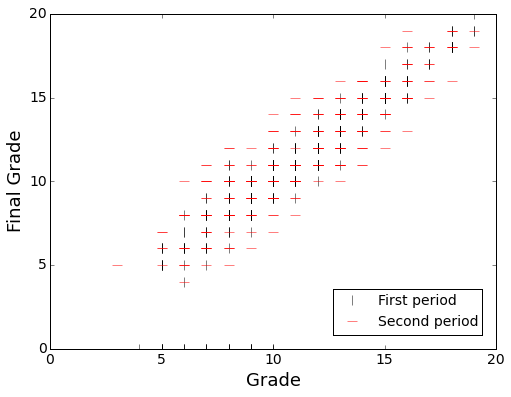

In [11]:
plt.plot(df.G2, df.G3, 'k|', label='First period', ms=10)
plt.plot(df.G1, df.G3, 'r_', label='Second period', ms=10)
plt.xlabel('Grade')
plt.ylabel('Final Grade')
plt.legend(loc='lower right')

We see that both predictors give a good indication of G3. However, G1 or First period has values of zero for G3. A one-feature model would be G3 ~ G2.

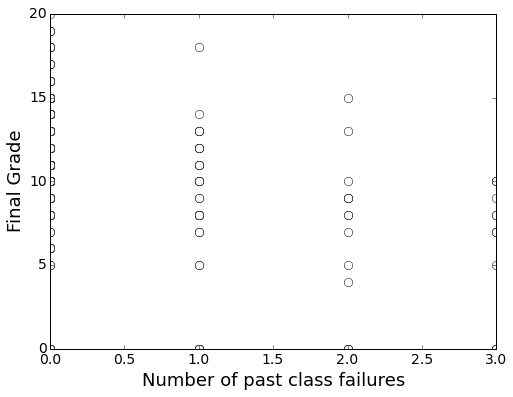

In [12]:
plt.plot(df.failures, df.G3, 'wo')
plt.xlabel('Number of past class failures')
plt.ylabel('Final Grade')

(-0.2, 1.2)

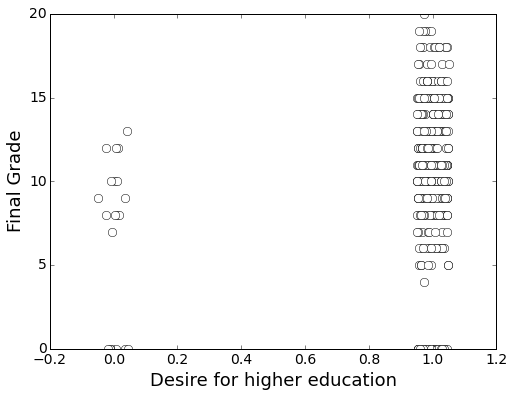

In [13]:
from random import random as rng
plt.plot(df.higher + np.array([0.1*(rng() - 0.5) for _ in range(len(df))]), df.G3, 'wo')
plt.xlabel('Desire for higher education')
plt.ylabel('Final Grade')
plt.xlim(-0.2, 1.2)

### Regression model

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.G3.values)

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rf = RandomForestRegressor(n_estimators=100, criterion='mse')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

param_grid = dict(alpha=np.logspace(-3, 3, base=10, num=15))
rd = Ridge()
grid = GridSearchCV(rd, param_grid, cv=10, scoring='mean_squared_error').fit(X_train, y_train)
rd = grid.best_estimator_
y_pred_rd = rd.predict(X_test)

ls = Lasso()
grid = GridSearchCV(ls, param_grid, cv=10, scoring='mean_squared_error').fit(X_train, y_train)
ls = grid.best_estimator_
y_pred_ls = ls.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

print 'model ===== R2 == R2 == MSE'
print 'linear:   %.3f %.3f %.3f' % (lr.score(X_test, y_test), r2_score(y_test, y_pred_lr), mse(y_pred_lr, y_test))
print 'rnd frst: %.3f %.3f %.3f' % (rf.score(X_test, y_test), r2_score(y_test, y_pred_rf), mse(y_pred_rf, y_test))
print 'ridge:    %.3f %.3f %.3f' % (rd.score(X_test, y_test), r2_score(y_test, y_pred_rd), mse(y_pred_rd, y_test))
print 'lasso:    %.3f %.3f %.3f' % (ls.score(X_test, y_test), r2_score(y_test, y_pred_ls), mse(y_pred_ls, y_test))

model ===== R2 == R2 == MSE
linear:   0.752 0.752 3.886
rnd frst: 0.849 0.849 2.360
ridge:    0.822 0.822 2.787
lasso:    0.836 0.836 2.579


(-15, 15)

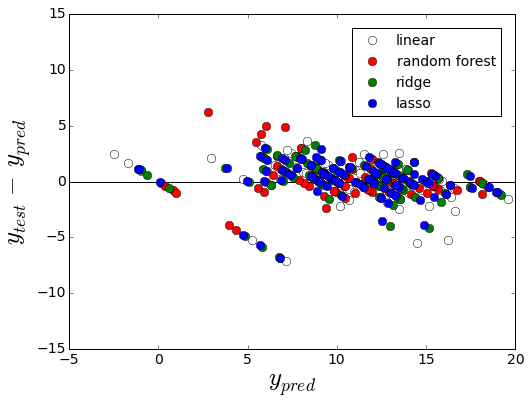

In [19]:
plt.hlines(y=0.0, xmin=-5, xmax=20, color='k')
plt.plot(y_pred_lr, y_test - y_pred_lr, 'wo', label='linear')
plt.plot(y_pred_rf, y_test - y_pred_rf, 'ro', label='random forest')
plt.plot(y_pred_rd, y_test - y_pred_rd, 'go', label='ridge')
plt.plot(y_pred_ls, y_test - y_pred_ls, 'bo', label='lasso')
plt.xlabel('$y_{pred}$', fontsize=25)
plt.ylabel('$y_{test}\, -\, y_{pred}$', fontsize=25)
plt.legend()
plt.ylim(-15, 15)

### Aside on data preprocessing using scikit-learn

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

d = pd.DataFrame({'color':['blue', 'green', 'red'], 'size':[1, 2, 3], 'gender':['male', 'female', 'male']})
print d
X = d.values
color_le = LabelEncoder()
gender_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X[:, 1] = gender_le.fit_transform(X[:, 1])
print X
ohe = OneHotEncoder(categorical_features=[0], sparse=False)
X = ohe.fit_transform(X)
print X

   color  gender  size
0   blue    male     1
1  green  female     2
2    red    male     3
[[0 1 1]
 [1 0 2]
 [2 1 3]]
[[ 1.  0.  0.  1.  1.]
 [ 0.  1.  0.  0.  2.]
 [ 0.  0.  1.  1.  3.]]
